# Riconoscitore e risolutore di espressioni matematiche scritte a mano

![Logo Sapienza](logo.png "Logo Sapienza")

Frasca Emanuele - 1836098

# Caricamento delle librerie

Carichiamo le librerie che utilizzeremo nel progetto tra cui Numpy, Pandas, Matplotlib, OpenCV2, Sympy e Tensorflow.

In [1]:
print("Sto per caricare le librerie necessarie...")

print("Sto per caricare Numpy, Pandas e Matplotlib...")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Sto per caricare os...")
import os
from os import listdir
from os.path import isfile, join

print("Sto per caricare re, math e sympy...")
import re
import math
from sympy import symbols, Eq, solve
from sympy.parsing.sympy_parser import parse_expr
from sympy import *

print("Sto per caricare PIL e OpenCV...")
import cv2
from PIL import Image

print("Sto per caricare Tensorflow e Keras...")
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Controllo se sono disponibili delle GPU per il training del modello:")
gpu = tf.config.list_physical_devices('GPU')
if len(gpu) == 0: print("Non sono disponibili GPU") 
else: print(gpu)


print("Fatto")

Sto per caricare le librerie necessarie...
Sto per caricare Numpy, Pandas e Matplotlib...
Sto per caricare os...
Sto per caricare re, math e sympy...
Sto per caricare PIL e OpenCV...
Sto per caricare Tensorflow e Keras...
Controllo se sono disponibili delle GPU per il training del modello:
Non sono disponibili GPU
Fatto


# Definizione della funzione per il caricamento del dataset

Stampiamo tutte le cartelle del nostro dataset.

In [11]:
p = "training/"
t = "test/"

print("Queste sono le cartelle del dataset:")

folders = []

for f in os.listdir(p):
    folders.append(f)

print(folders)


Queste sono le cartelle del dataset:
['!', '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cos', 'div', 'eq', 'mul', 'sin', 'y', 'z', '[', ']']


Definiamo una funzione che presa una cartella contenete immagini che rappresentano un elemento di un'espressione ne effettua un preprocessing in modo tale che le immagini siano standardizzate per poi poter essere lette dal modello.

In [30]:
print("Definisco una funzione per caricare le immagini...")

max_elems = 500 #numero massimo elementi da caricare per cartella

def load_images(folder):
    
    train_data=[]
    
    num_elems = 0

    for filename in os.listdir(folder):

        num_elems = num_elems + 1

        if num_elems == (max_elems + 1): break
        
        image = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        image = ~image

        if image is not None:

            ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
            im_resize = cv2.resize(thresh,(28,28))
            im_resize = np.reshape(im_resize,(784,1))
            train_data.append(im_resize)

    return train_data

print("Fatto")

Definisco una funzione per caricare le immagini...
Fatto


Provo a caricare e stampare degli elementi contenuti nella cartella "+".

Carico la cartella '+'...
Fatto
Effettuo il reshape di '+'...
Fatto


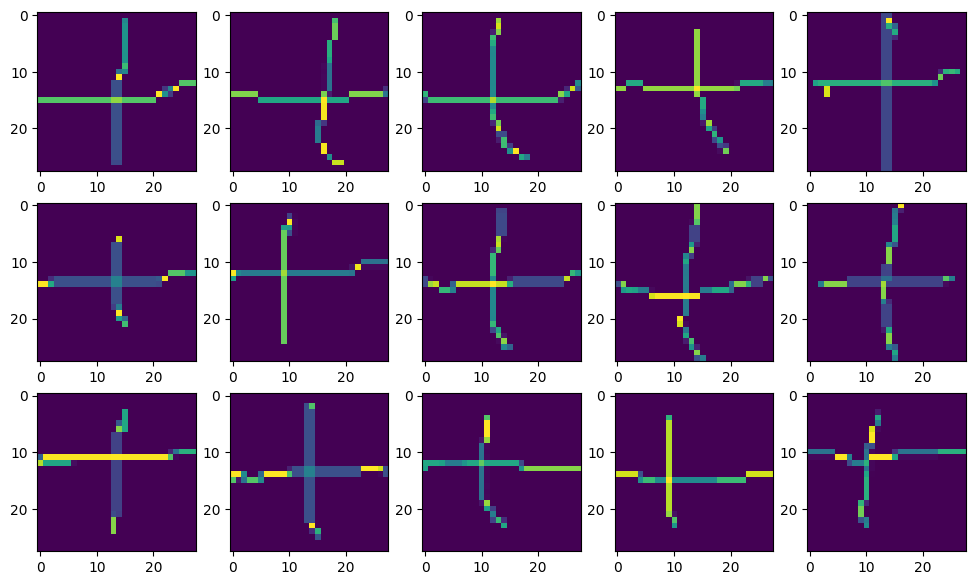

In [31]:
print("Carico la cartella '+'...")
lista = load_images("test/+")
print("Fatto")


fin_list = []

print("Effettuo il reshape di '+'...")
for image in lista:
    fin_list.append(image.reshape(28,28,1))
print("Fatto")

_, axs = plt.subplots(3, 5, figsize=(12, 7))
axs = axs.flatten()
for img, ax in zip(fin_list, axs):
    ax.imshow(img)
plt.show()


# Creazione array di training

Inizializzo l'array di training inserendo come primo elemento le immagini contenute nella cartella 0, poi effettuo una concatenzione di tutti gli altri elementi.

In [33]:
print("Sto per inizializzare l'array di train...")

train = load_images(p+"0")

for i in range(0, len(train)):
    train[i] = np.append(train[i], ['0'])

print("L'array di train contiene: " + str(len(train)) + " elementi")
print("Fatto")

Sto per inizializzare l'array di train...
L'array di train contiene: 500 elementi
Fatto


In [34]:
iter = 0

for i in list(os.listdir(p)) :
    
    if i not in ["0"] :
        
        print("Sto lavorando con la cartella ", i)

        data_i = load_images(p+i)

        if i in [str(k) for k in range(1, 10)] :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "+" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "-" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])


        if i == "mul" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "div" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "eq" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])

        if i == "dec" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])


        if i == "y" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"]) 


        if i == "z" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["17"]) 
        
        if i == "(" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["18"]) 
        
        if i == ")" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["19"]) 
        
        if i == "!" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["20"]) 
        
        if i == "sin" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["21"]) 
        
        if i == "cos" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["22"])
            
        if i == "[" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["23"])
        
        if i == "]" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["24"]) 


        train = np.concatenate((train, data_i))
        print("L'array di train contiene: " + str(len(train)) + " elementi")

        print()

        iter += 1

print("Fatto")

Sto lavorando con la cartella  !
L'array di train contiene: 1000 elementi

Sto lavorando con la cartella  (
L'array di train contiene: 1500 elementi

Sto lavorando con la cartella  )
L'array di train contiene: 2000 elementi

Sto lavorando con la cartella  +
L'array di train contiene: 2500 elementi

Sto lavorando con la cartella  -
L'array di train contiene: 3000 elementi

Sto lavorando con la cartella  1
L'array di train contiene: 3500 elementi

Sto lavorando con la cartella  2
L'array di train contiene: 4000 elementi

Sto lavorando con la cartella  3
L'array di train contiene: 4500 elementi

Sto lavorando con la cartella  4
L'array di train contiene: 5000 elementi

Sto lavorando con la cartella  5
L'array di train contiene: 5500 elementi

Sto lavorando con la cartella  6
L'array di train contiene: 6000 elementi

Sto lavorando con la cartella  7
L'array di train contiene: 6500 elementi

Sto lavorando con la cartella  8
L'array di train contiene: 7000 elementi

Sto lavorando con la cart

# Creazione array di test

Inizializzo l'array di test inserendo come primo elemento le immagini contenute nella cartella 0, poi effettuo una concatenzione di tutti gli altri elementi.

In [35]:
print("Sto per inizializzare l'array di test...")

test = load_images(t+"0")

for i in range(0, len(test)):
    test[i] = np.append(test[i], ['0'])

print(len(test))

Sto per inizializzare l'array di test...
324


In [36]:
iter = 0

for i in list(os.listdir(t)) :
    
    if i not in ["0"] :
    
        print("Sto lavorando con la cartella ", i)

        data_i = load_images(t+i)

        if i in [str(k) for k in range(1, 10)] :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "+" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "-" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])


        if i == "mul" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "div" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "eq" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])

        if i == "dec" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])


        if i == "y" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"]) 


        if i == "z" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["17"]) 
        
        if i == "(" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["18"]) 
        
        if i == ")" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["19"]) 
        
        if i == "!" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["20"]) 
        
        if i == "sin" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["21"]) 
        
        if i == "cos" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["22"]) 
        
        if i == "[" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["23"]) 

        if i == "]" :
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["24"]) 


        test = np.concatenate((test, data_i))
        print("L'array di test contiene: " + str(len(test)) + " elementi")

        print()

        iter += 1

print("Fatto")

Sto lavorando con la cartella  !
L'array di test contiene: 504 elementi

Sto lavorando con la cartella  (
L'array di test contiene: 882 elementi

Sto lavorando con la cartella  )
L'array di test contiene: 1287 elementi

Sto lavorando con la cartella  +
L'array di test contiene: 1710 elementi

Sto lavorando con la cartella  -
L'array di test contiene: 2052 elementi

Sto lavorando con la cartella  1
L'array di test contiene: 2552 elementi

Sto lavorando con la cartella  2
L'array di test contiene: 3052 elementi

Sto lavorando con la cartella  3
L'array di test contiene: 3552 elementi

Sto lavorando con la cartella  4
L'array di test contiene: 4029 elementi

Sto lavorando con la cartella  5
L'array di test contiene: 4529 elementi

Sto lavorando con la cartella  6
L'array di test contiene: 5029 elementi

Sto lavorando con la cartella  7
L'array di test contiene: 5529 elementi

Sto lavorando con la cartella  8
L'array di test contiene: 6015 elementi

Sto lavorando con la cartella  9
L'array

# Creazione set di training

Trasformo l'array di training in un dataframe di Pandas, poi estraggo le label contenute nell'ultima colonna.

In [37]:
df=pd.DataFrame(train,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('train.csv',index_col=False)
train_labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,12,214,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,57,178,178,178,178,178,...,178,94,43,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,12,154,...,0,0,0,0,0,0,0,0,0,0


Categorizzo le label per poter essere successivamente comprese dal modello.

In [38]:
np.random.seed(1212)
train_labels=np.array(train_labels)
train_cat=to_categorical(train_labels,num_classes=25)
train_cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Riporto il dataframe in forma matriciale di numpy e ne effettuo un reshape.

In [39]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(12000, 28, 28, 1)

# Creazione set di test

Trasformo l'array di test un un dataframe di Pandas, poi estraggo le label contenute nell'ultima colonna.

In [40]:
df=pd.DataFrame(test,index=None)
df.to_csv('test_handwritten.csv',index=False)

test = pd.read_csv('test.csv',index_col=False)
test_labels = test[['784']]

test.drop(test.columns[[784]],axis=1,inplace=True)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,12,214,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,57,178,178,178,178,178,...,178,94,43,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,12,154,...,0,0,0,0,0,0,0,0,0,0


Categorizzo le label per poter essere successivamente comprese dal modello.

In [41]:
np.random.seed(1212)
test_labels=np.array(test_labels)
test_cat=to_categorical(test_labels,num_classes=25)
test_cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Riporto il dataframe in forma matriciale di numpy e ne effettuo un reshape.

In [42]:
temp=test.to_numpy()
X_test = temp.reshape(temp.shape[0], 28, 28, 1)
X_test.shape

(10185, 28, 28, 1)

# Definizione e training del modello

Definisco il modello sequenziale che successivamente alleneremo, poi ne stampo un sommario.

In [45]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # randomly drop units and their connections during the training process. In this case, we’ll drop 20% of the units:
model.add(Flatten()) # convert the previous hidden layer into a 1D array:
model.add(Dense(128, activation='relu')) # Relu is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax')) #The softmax activation is used when we’d like to classify the data into a number of pre-decided classes.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 15)          0         
                                                                 
 flatten_1 (Flatten)         (None, 540)              

Compiliamo e alleniamo il nostro modello, successivamente lo salviamo nel file "modello.h5" (modello contenuto nella repository allenato con impostazioni differenti).

In [46]:
checkpoint = ModelCheckpoint("modello.h5", monitor='accuracy', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn = model.fit(X_train, train_cat, epochs=50,validation_data=(X_test,test_cat), batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 5.0568 - accuracy: 0.0614
Epoch 1: accuracy improved from -inf to 0.06142, saving model to modello.h5
47/47 [==============================] - 7s 124ms/step - loss: 5.0568 - accuracy: 0.0614 - val_loss: 3.1564 - val_accuracy: 0.1005
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 3.0266 - accuracy: 0.1302
Epoch 2: accuracy improved from 0.06142 to 0.13017, saving model to modello.h5
47/47 [==============================] - 5s 100ms/step - loss: 3.0266 - accuracy: 0.1302 - val_loss: 2.7881 - val_accuracy: 0.2503
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 2.4717 - accuracy: 0.3076
Epoch 3: accuracy improved from 0.13017 to 0.30758, saving model to modello.h5
47/47 [==============================] - 4s 95ms/step - loss: 2.4717 - accuracy: 0.3076 - val_loss: 1.9357 - val_accuracy: 0.5153
Epoch 4/50
47/47 [==============================] - ETA: 0s - loss: 1.7538 - accuracy: 0.497

Effettuiamo un plotting dei risultati ottenuti dal nostro modello per valutare possibile overfitting.

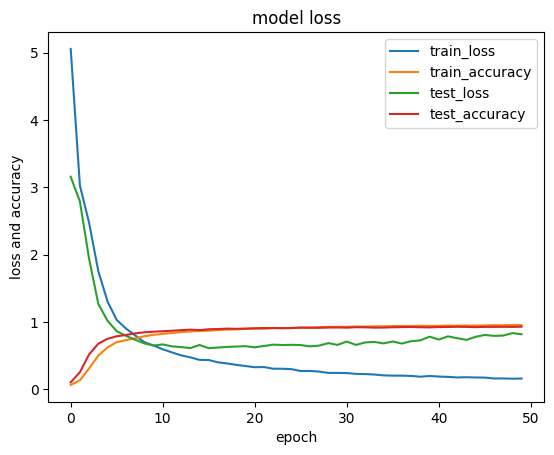

In [47]:
plt.plot(nn['loss'])
plt.plot(nn['accuracy'])
plt.plot(nn['val_loss'])
plt.plot(nn['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss and accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss', 'train_accuracy', 'test_loss', 'test_accuracy'], loc='upper right')

# Riconoscimento

Carichiamo il modello allenato in precedenza dal disco.

In [52]:
model = load_model("modello.h5")

Carico l'espressione da riconoscere dal disco e la stampo a schermo.

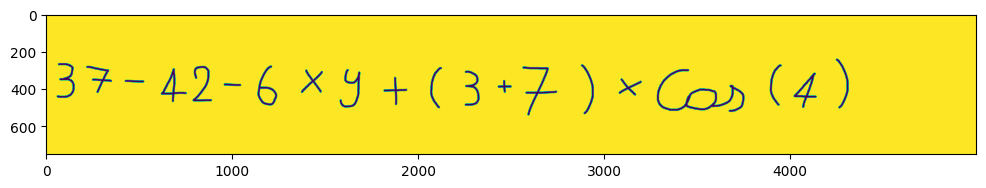

In [54]:
espressione = 'espressioni/1.png'

img = cv2.imread(espressione,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (12,12))
plt.imshow(img)

Per mezzo di OpenCV cerco i singoli elementi che compongono l'espressione, poi li stampo a video.

Ho trovato: 20 contorni
Ho trovato un elemento con un'altezza minore di 20, effettuo una erode
Ho trovato un elemento con un'altezza minore di 20, effettuo una erode


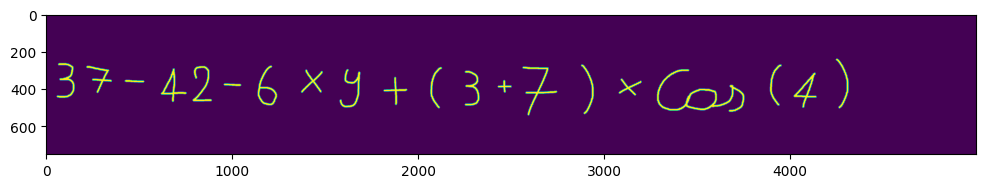

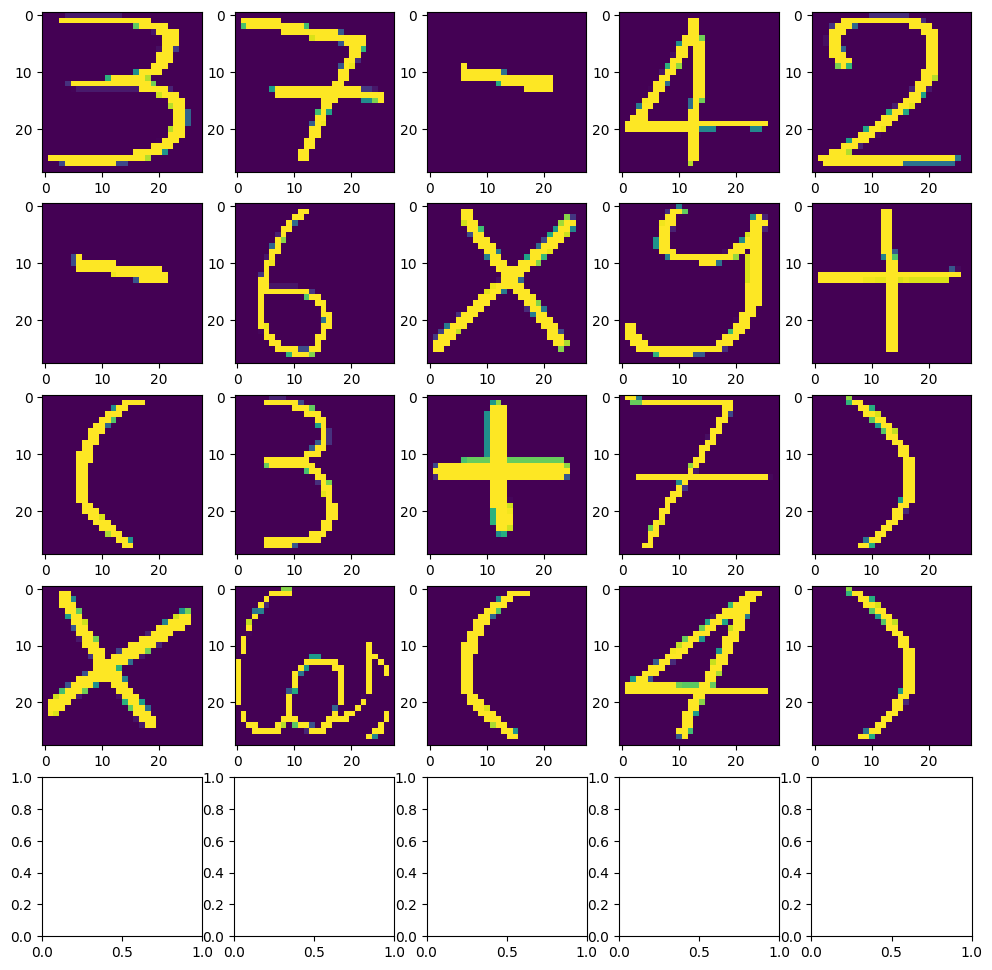

In [55]:
import matplotlib

img = cv2.imread(espressione,cv2.IMREAD_GRAYSCALE)

if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    plt.figure(figsize = (12,12))
    plt.imshow(thresh)

    w=int(28)
    h=int(28)
    train_data=[]
    print("Ho trovato: " + str(len(cnt)) + " contorni")

    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        if(h>w*2):
            w= w*2
            x=x-25
        rect=[x-4,y-4,w+4,h+4]
        rects.append(rect)
    bool_rect=[]

    add=10

    
    for r in rects:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]

        im_crop =thresh[y:y+h+add,x:x+w+add]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))

        if(h<20):
            print("Ho trovato un elemento con un'altezza minore di 20, effettuo una erode")
            kernel = np.ones((8, 8), np.uint8)
            im_resize = cv2.erode(im_resize, kernel, iterations=1)

        train_data.append(im_resize)
    

rows = int(math.sqrt(len(train_data))) + 1
cols = rows
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(train_data):
            axes[i, j].imshow(train_data[img_count])
            img_count+=1


Effettuiamo delle predizioni su ogni singolo elemento che abbiamo individuato nella fase precedente grazie ed OpenCV utilizzando il modello creato in precedenza.

1/1 [==============================] - 0s 33ms/step
Il valore cercato è [3] con una probabilità del: 99.99980926513672 %
1/1 [==============================] - 0s 31ms/step
Il valore cercato è [7] con una probabilità del: 99.99992847442627 %
1/1 [==============================] - 0s 30ms/step
Il valore cercato è [11] con una probabilità del: 97.63168096542358 %
1/1 [==============================] - 0s 62ms/step
Il valore cercato è [4] con una probabilità del: 99.9976634979248 %
1/1 [==============================] - 0s 31ms/step
Il valore cercato è [2] con una probabilità del: 99.99969005584717 %
1/1 [==============================] - 0s 30ms/step
Il valore cercato è [11] con una probabilità del: 95.86306810379028 %
1/1 [==============================] - 0s 34ms/step
Il valore cercato è [6] con una probabilità del: 100.0 %
1/1 [==============================] - 0s 26ms/step
Il valore cercato è [12] con una probabilità del: 100.0 %
1/1 [==============================] - 0s 31ms/step
Il

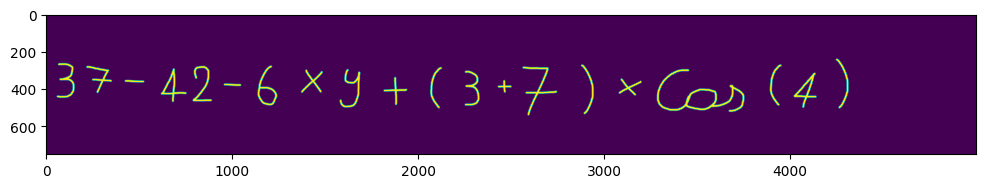

In [61]:
expression=''
prob_tot = 0

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    probabilities=model.predict(train_data[i])
    
    prediction = np.argmax(probabilities, axis=-1)

    prob_tot = prob_tot + max(probabilities[0])*100

    print("Il valore cercato è " + str(prediction) + " con una probabilità del: " + str(max(probabilities[0])*100) + " %")
    
        
    for j in range(10) :
        if prediction[0] == j :
            expression = expression + str(j)
    
    if prediction[0] == 10 :
        expression = expression + "+"
    if prediction[0] == 11 :
        expression = expression + "-"
    if prediction[0] == 12 :
        expression = expression + "*"
    if prediction[0] == 13 :
        expression = expression + "/"
    if prediction[0] == 14 :
        expression = expression + "="
    if prediction[0] == 15 :
        expression = expression + "."
    if prediction[0] == 16 :
        expression = expression + "y"      
    if prediction[0] == 17 :
        expression = expression + "z"
    if prediction[0] == 18 :
        expression = expression + "("
    if prediction[0] == 19 :
        expression = expression + ")"
    if prediction[0] == 20 :
        expression = expression + "!"
    if prediction[0] == 21 :
        expression = expression + "sin"
    if prediction[0] == 22 :
        expression = expression + "cos"
    if prediction[0] == 23 :
        expression = expression + "["
    if prediction[0] == 24 :
        expression = expression + "]"

plt.figure(figsize = (12,12))
plt.imshow(img)
print()
print()
print("L'espressione cercata è", espressione, "con una probabilità del ", prob_tot/len(train_data), "%")

# Parsing e calcolo

Effettuiamo il parsing ed il calcolo dell'equazione associata all'espressione data grazie alla libreria Sympy

In [64]:
print("Imposto, a partire dall'espressione data una equazione = 0:")

print(str(expression) + " = 0")
print()

print("Effettuo il parsing dell'equazione:")

if "[" in expression or "]" in expression:
    equation = expression.replace("[", "(" )
    equation = expression.replace("]", ")" )

x = symbols('y')
eparsing = sympify(str(expression))
eparsing = eparsing.evalf()
print(eparsing)
print()

soluzione = solve(eparsing)

print("Stampo la soluzione dell'equazione:")
print(soluzione[0])

Imposto, a partire dall'espressione data una equazione = 0:
37-42-6*y+(3+7)*cos(4) = 0

Effettuo il parsing dell'equazione:
-6.0*y - 11.5364362086361

Stampo la soluzione dell'equazione:
-1.92273936810602
